1.Importing Pandas,Numpy,Matplotlib,Seaborn and Warnings Library 

In [3]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

2.Import the csv Data as Pandas Dataframe

In [4]:
df=pd.read_csv('data/stud.csv')

In [5]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
df.shape

(1000, 8)

3.1 Check Missing Values

In [7]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There is no missing values in the data set

3.2 Check Duplicates

In [8]:
df.duplicated().sum()

0

There are no duplicate values in the data set

3.3 Check data types

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


3.4 Checking the number of unique values of each column

In [12]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

3.5 Check statistics of data set

In [13]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


INSIGHTS

   1.From above description of numerical data,all means are very close to each other-between 66 and 68.05;

2.All standard deviations are also close-between 14.6 and 15.19;

3.While there is a minimum score 0 for math,for writing minimum is much higher=10 and for reading is much higher=17

3.7 Exploring Data

In [16]:
print("Categories in 'gender' variable:  ",end=" ")
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable: ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in 'parental level of education' variable: ",end=" ")
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable: ",end=" ")
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable: ",end=" ")
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:   ['female' 'male']
Categories in 'race/ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:  ['standard' 'free/reduced']
Categories in 'test preparation course' variable:  ['none' 'completed']


In [21]:
#define numerical and categorical columns
numeric_features=[feature for feature in df.columns if df[feature].dtype != 'object']
categorical_features=[feature for feature in df.columns if df[feature].dtype=='object']

#print columns
print('We have {} numerical features : {}'.format(len(numeric_features),numeric_features))
print('We have {} categorical features : {}'.format(len(categorical_features),categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


3.8 Adding columns for "Total score" and "Average"

In [23]:
df['total_score']=df['math_score']+df['reading_score']+df['writing_score']
df['average']=df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [79]:
reading_full=df[df['reading_score']==100]['average'].count()
writing_full=df[df['writing_score']==100]['average'].count()
math_full=df[df['math_score']==100]['average'].count()

print(f'Number of students with full marks in maths: {math_full}')
print(f'Number of students with full marks in writing:{writing_full}')
print(f'Number of students with full marks in reading: {reading_full}')

Number of students with full marks in maths: 7
Number of students with full marks in writing:14
Number of students with full marks in reading: 17


In [27]:
reading_less_20=df[df['reading_score']<=20]['average'].count()
writing_less_20=df[df['writing_score']<=20]['average'].count()
math_less_20=df[df['math_score']<=20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in writing : {writing_less_20}')
print(f'Number of students with less than 20 marks in reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in writing : 3
Number of students with less than 20 marks in reading: 1


Insights

a.From above values we get students have performed the worst in Maths

b.Best performances is in reading section

4.Exploring Data

4.1 Visualise average score distribution to make some conclusion

a.Histogram

b.Kernel Distribution Function(KDE)

4.1.1 Histogram and KDE

<Axes: xlabel='average', ylabel='Count'>

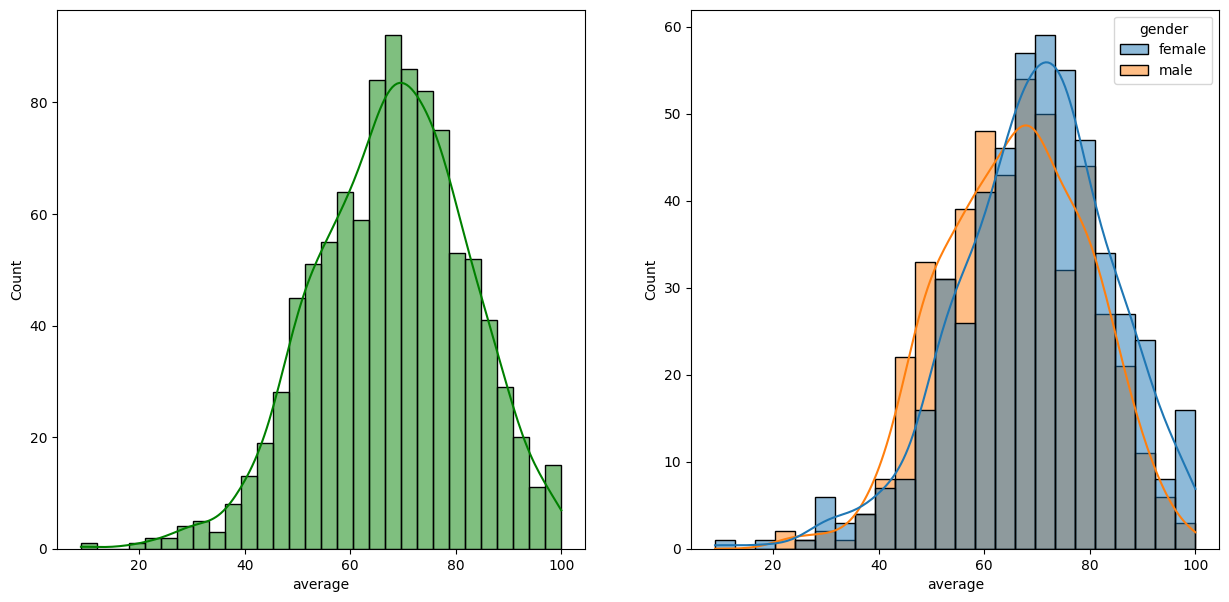

In [28]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')

<Axes: xlabel='total_score', ylabel='Count'>

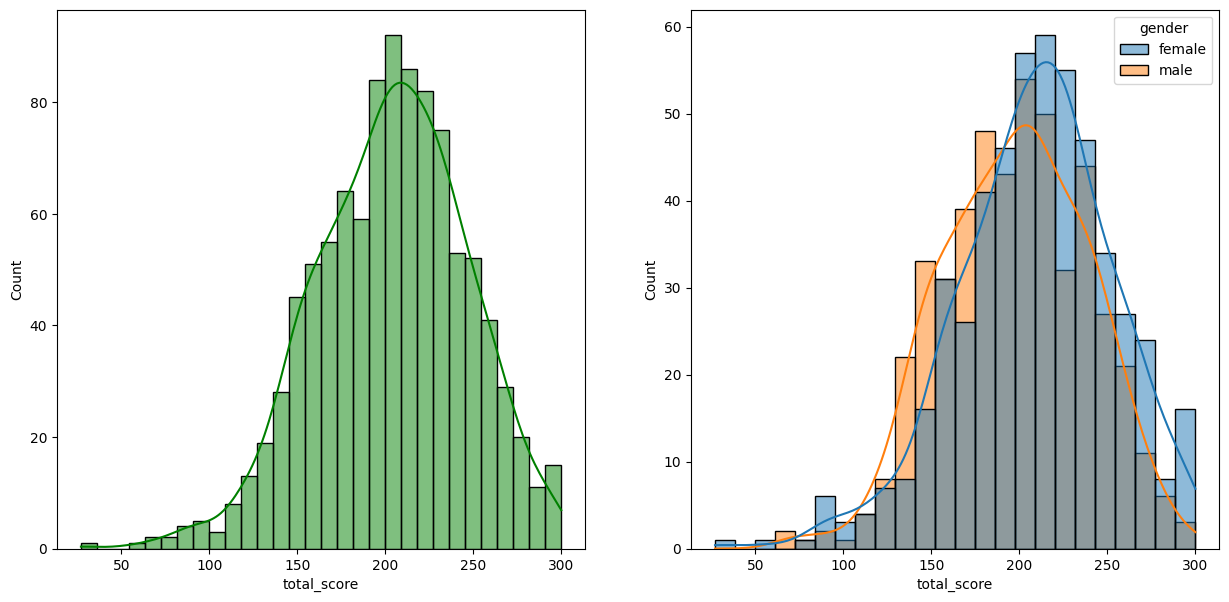

In [34]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')

Insights

a.Female Students tend to prform well than male students

<Axes: xlabel='average', ylabel='Count'>

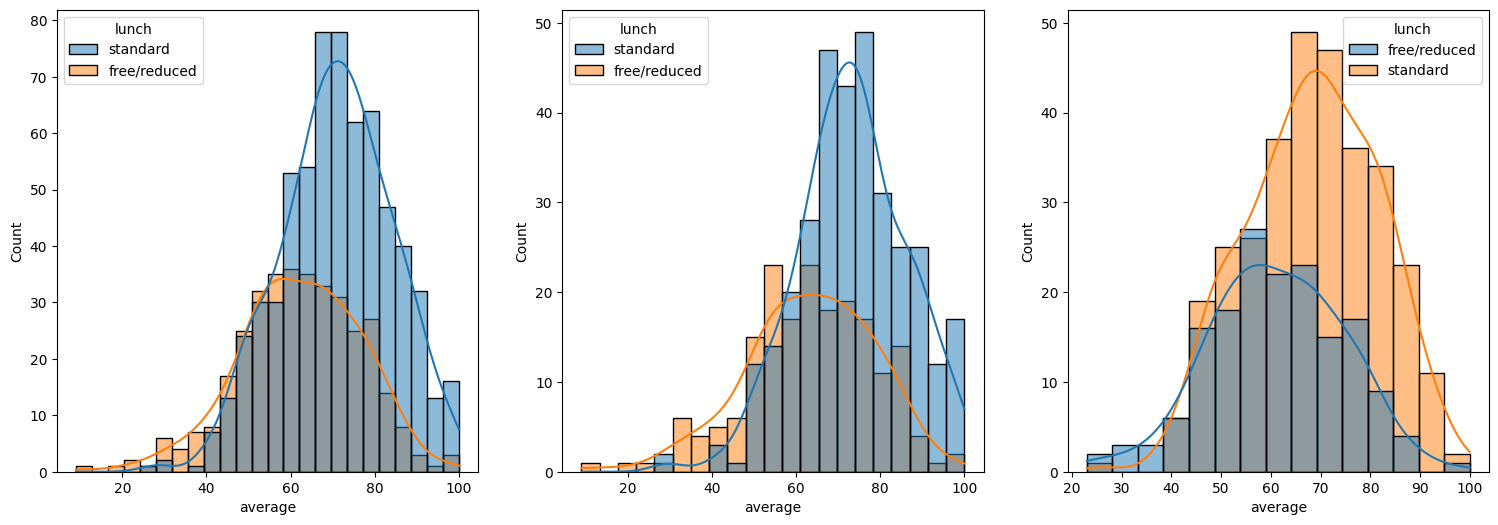

In [33]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')

Insights

a.Standard lunch helps perform well in exams

b.Standard lunch helps perform well in exams be it a male or a female

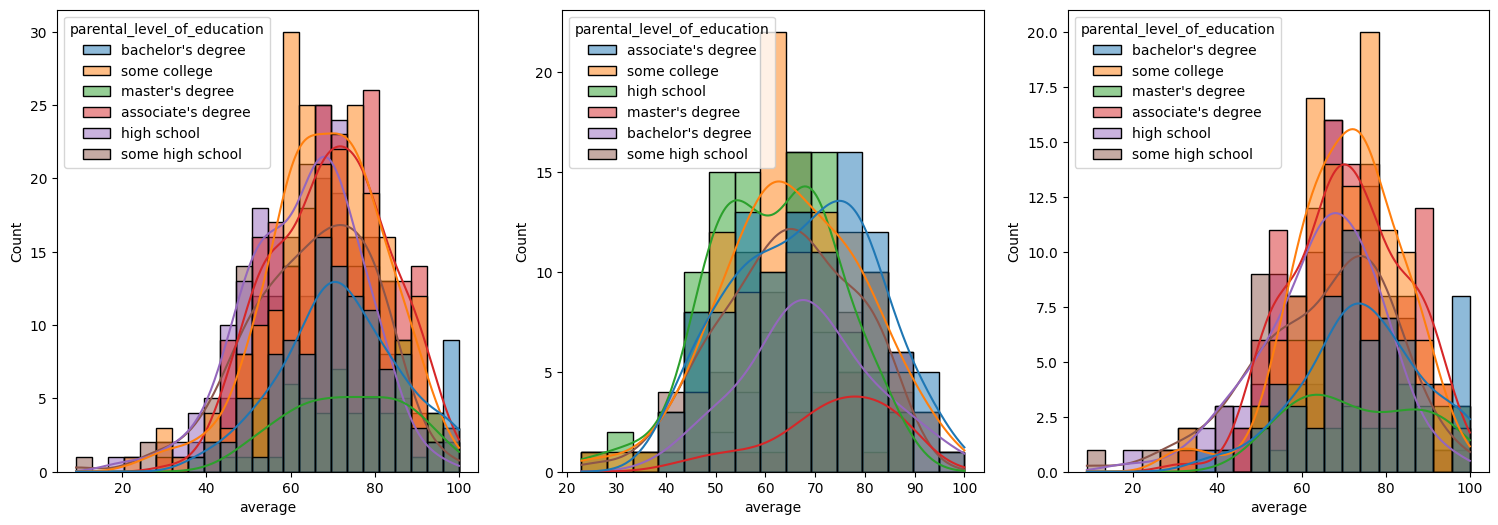

In [38]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax=sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax=sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax=sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

Insights

a.In general parent's education don't help student perform well in exam.

b.2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam

c.3rd plot we can see there is no effect of parent's education on female students.

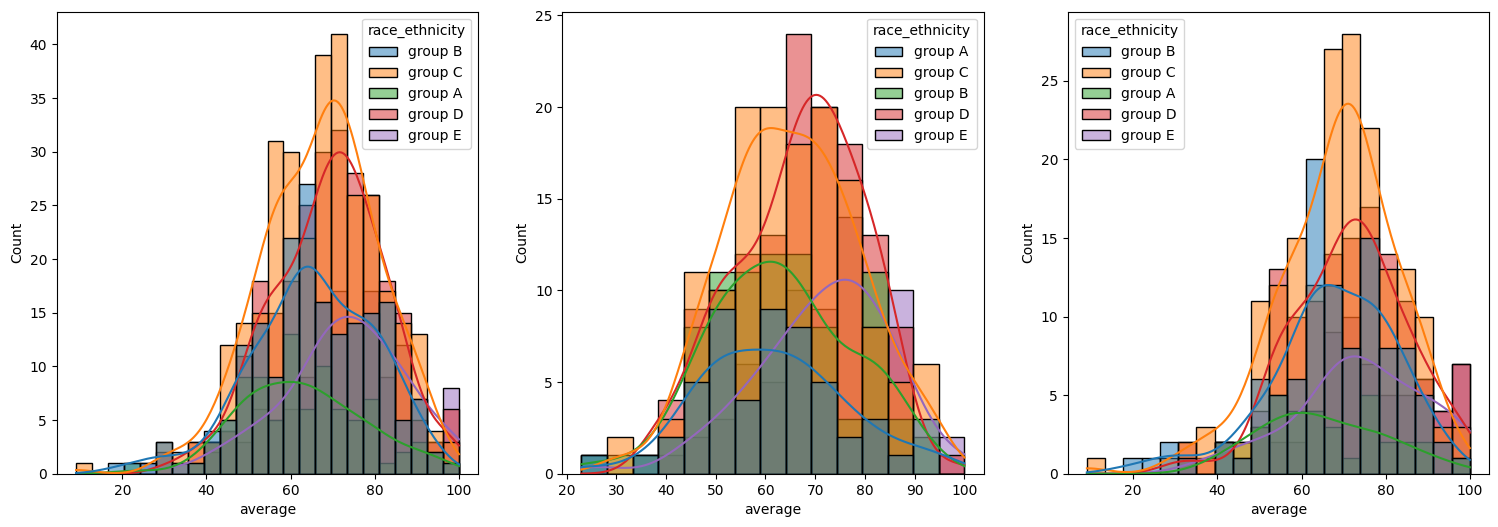

In [40]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax=sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax=sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax=sns.histplot(df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')

Insights

a.Students of group A and group B tends to perform poorly in exam.

b.Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

4.2 Maximumum score of students in all three subjects

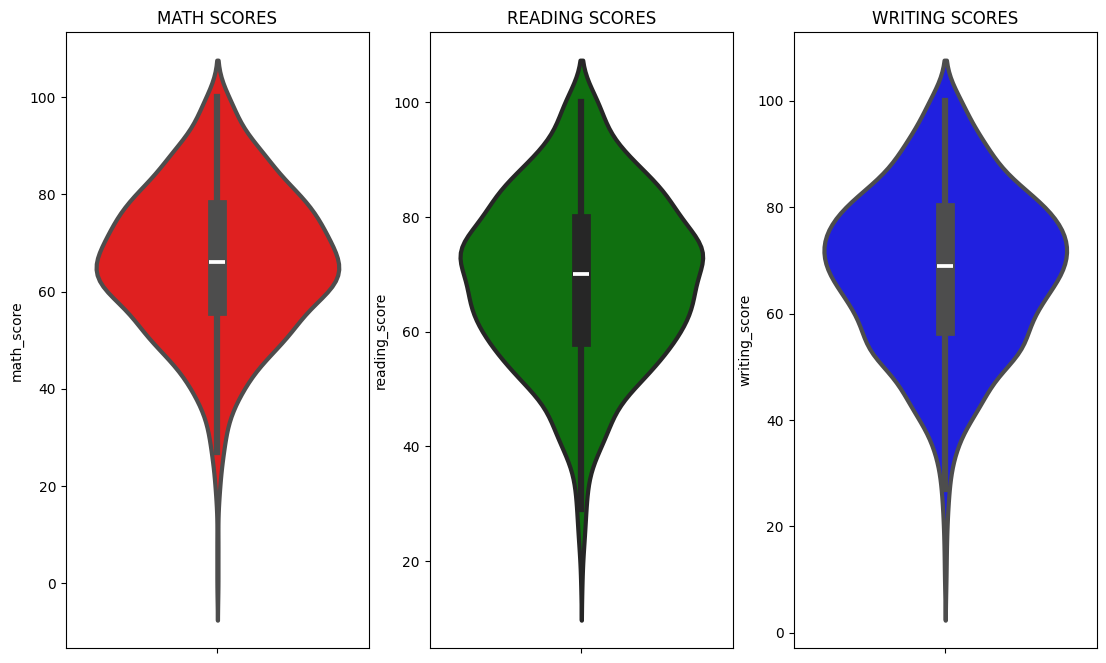

In [43]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1,4,2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1,4,3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

Insights

From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

4.3 Multivariate analysis using pieplot

(-1.25, 1.25, -1.25, 1.25)

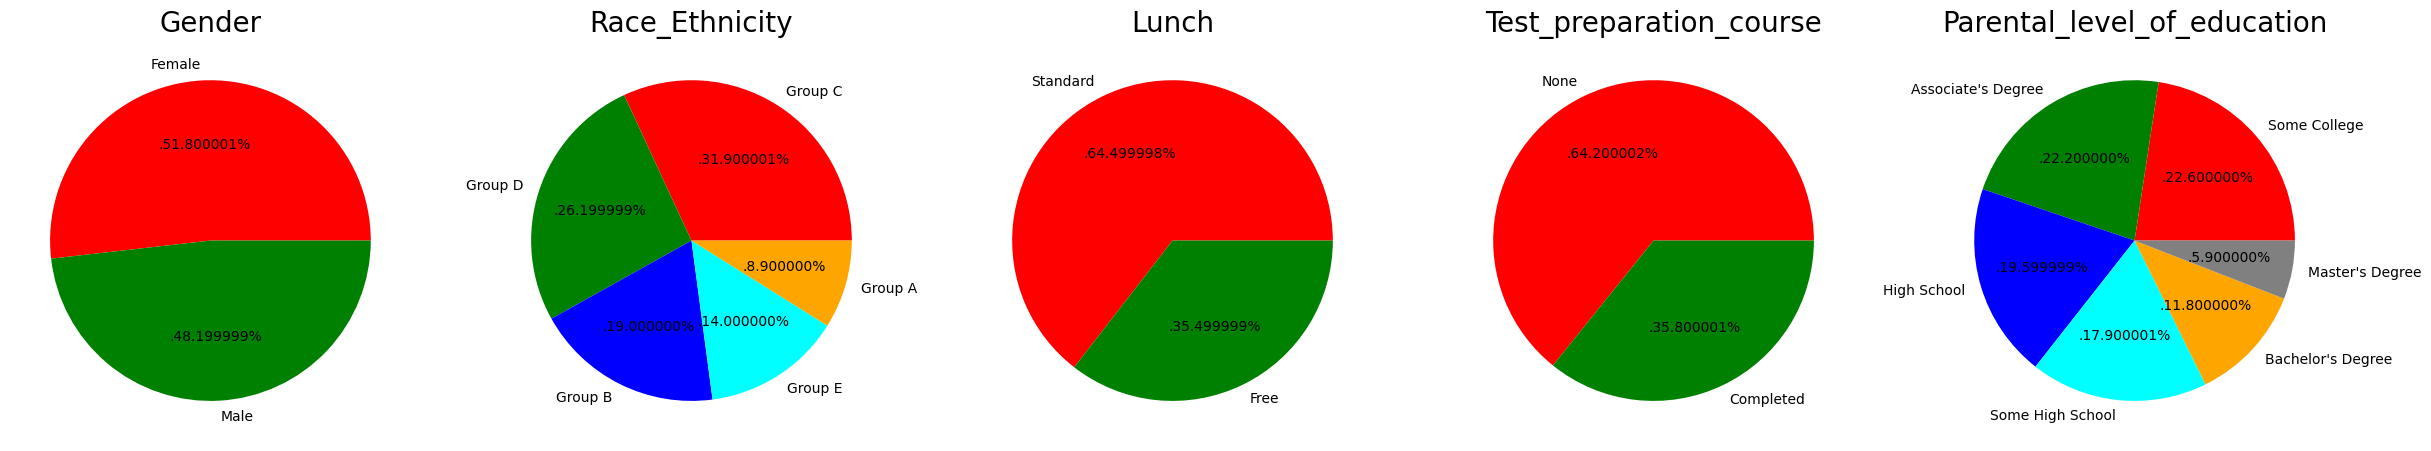

In [46]:
plt.rcParams['figure.figsize']=(30,12)

plt.subplot(1,5,1)
size=df['gender'].value_counts()
labels='Female','Male'
color=['red','green']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('Gender',fontsize=20)
plt.axis('off')

plt.subplot(1,5,2)
size=df['race_ethnicity'].value_counts()
labels='Group C','Group D','Group B','Group E','Group A'
color=['red','green','blue','cyan','orange']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('Race_Ethnicity',fontsize=20)
plt.axis('off')

plt.subplot(1,5,3)
size=df['lunch'].value_counts()
labels='Standard', 'Free'
color=['red','green']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('Lunch',fontsize=20)
plt.axis('off')

plt.subplot(1,5,4)
size=df['test_preparation_course'].value_counts()
color=['red','green']
labels='None', 'Completed'

plt.pie(size,labels=labels,colors=color,autopct='.%2f%%')
plt.title('Test_preparation_course',fontsize=20)
plt.axis('off')


plt.subplot(1,5,5)
size=df['parental_level_of_education'].value_counts()
labels='Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color=['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size,labels=labels,colors=color,autopct='.%2f%%')
plt.title('Parental_level_of_education',fontsize=20)
plt.axis('off')


Insights

a.Number of Male and Female students is almost equal

b.Number students are greatest in Group C

c.Number of students who have standard lunch are greater

d.Number of students who have not enrolled in any test preparation course is greater

e.Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

4.4 Feature Wise Visualization

4.4.1 GENDER COLUMN

How is distribution of Gender ?

Is gender has any impact on student's performance ?

UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

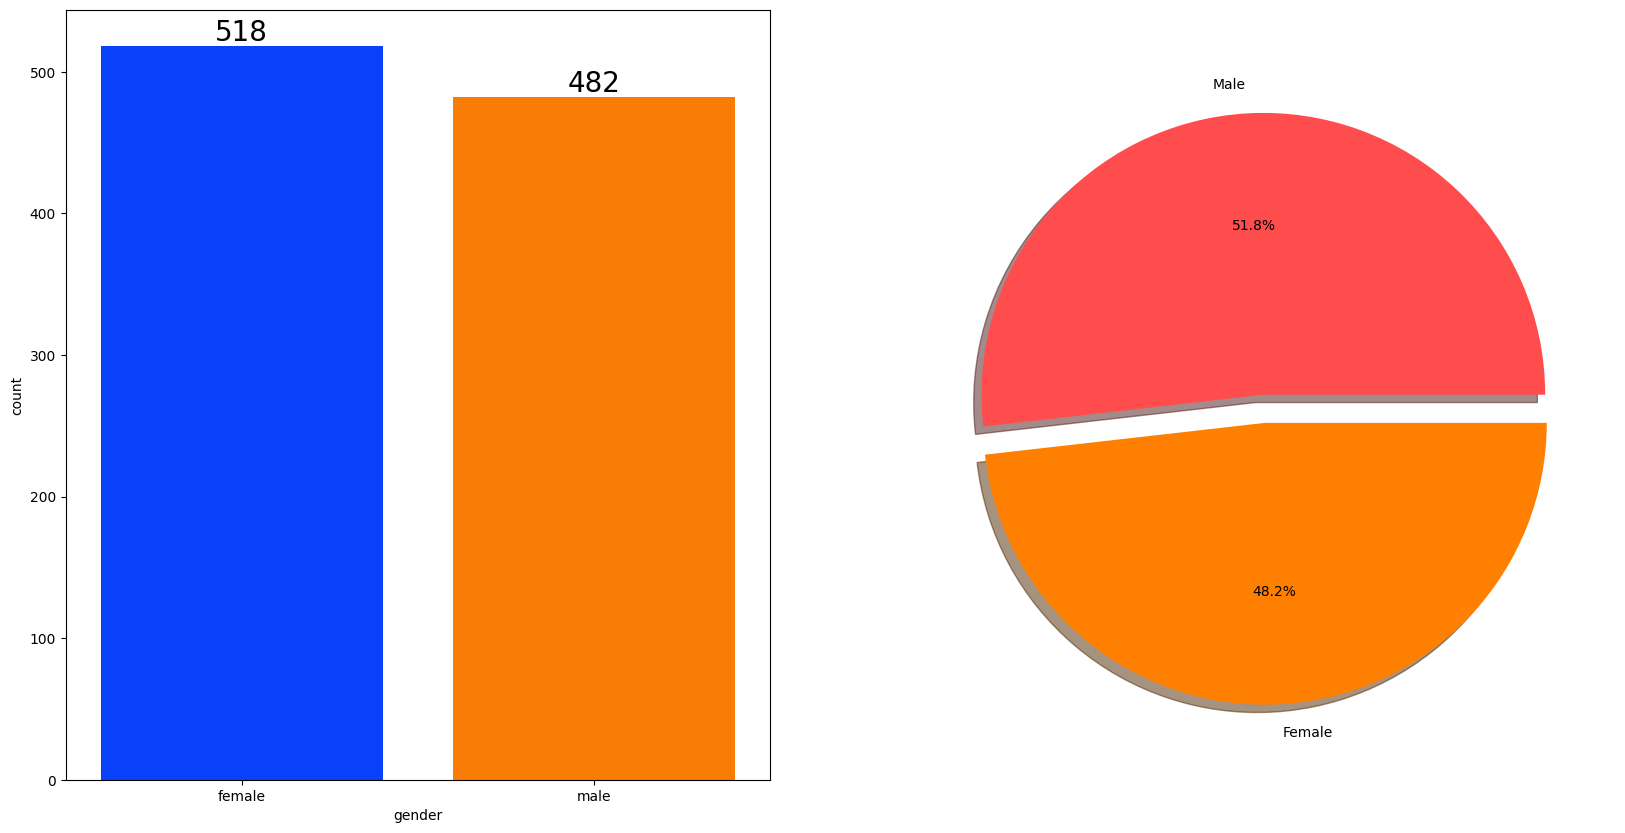

In [48]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()    

Insights

Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)

BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )

In [54]:
gender_group=df.groupby('gender')
gender_group

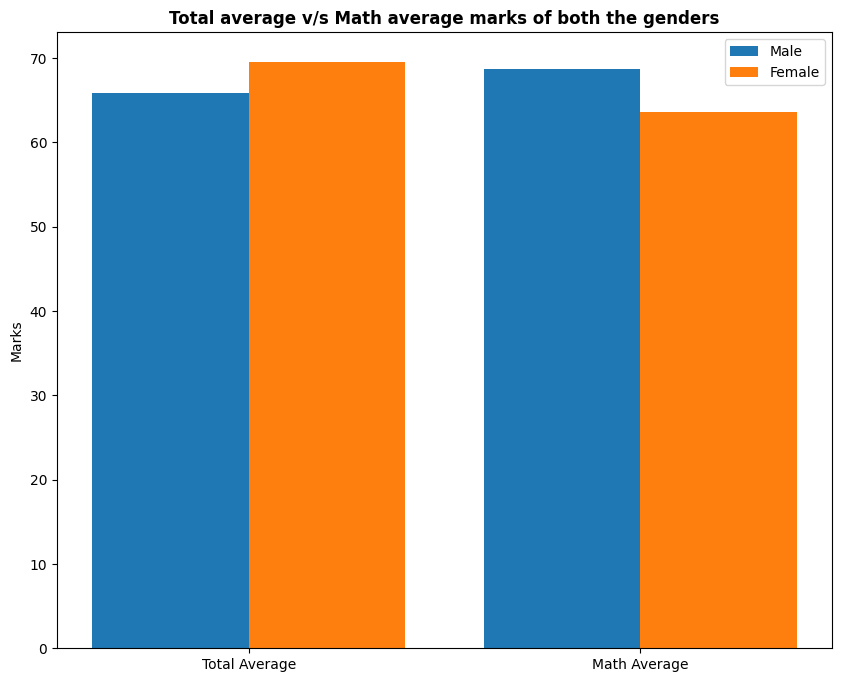

In [56]:
plt.figure(figsize=(10,8))
x=['Total Average','Math Average']

female_scores=[gender_group['average'].mean()[0],gender_group['math_score'].mean()[0]]
male_scores=[gender_group['average'].mean()[1],gender_group['math_score'].mean()[1]]

x_axis=np.arange(len(x))

plt.bar(x_axis-0.2,male_scores,0.4,label='Male')
plt.bar(x_axis+0.2,female_scores,0.4,label='Female')

plt.xticks(x_axis,x)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders",fontweight='bold')
plt.legend()
plt.show()

Insights

a.On an average females have a better overall score than men.

b.whereas males have scored higher in Maths.

4.4.2 RACE/EHNICITY COLUMN

How is Group wise distribution ?

Is Race/Ehnicity has any impact on student's performance ?

UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

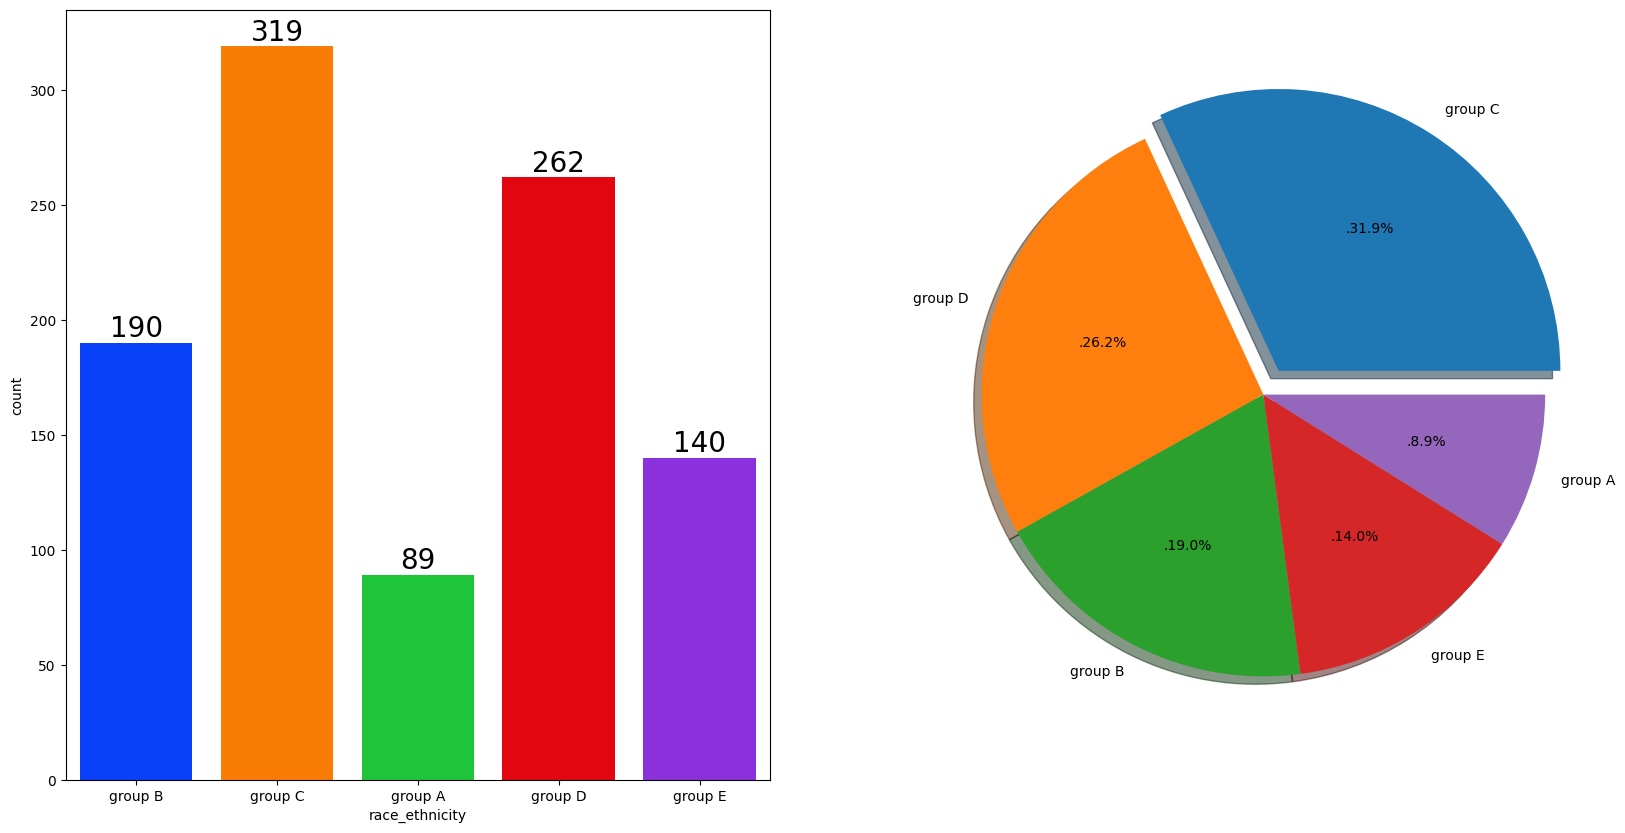

In [57]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='.%1.1f%%',shadow=True)
plt.show()    

Insights

a. Most of the student belonging from group C /group D.

b. Lowest number of students belong to groupA.

BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

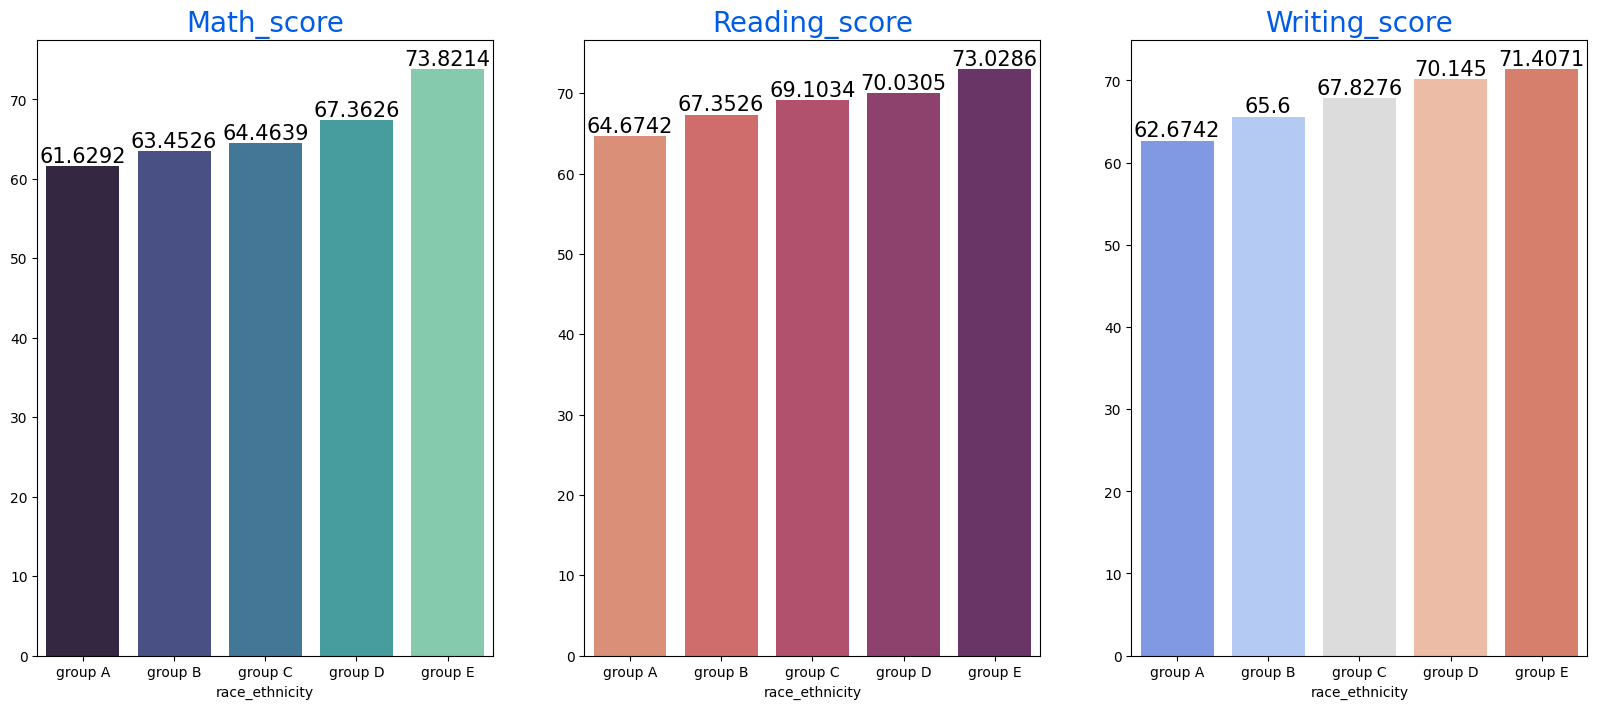

In [58]:
group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=group_data2['math_score'].mean().index,y=group_data2['math_score'].mean().values,palette='mako',ax=ax[0])
ax[0].set_title('Math_score',color="#005ce6",size=20)

for container in ax[0].containers:
     ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=group_data2['reading_score'].mean().index,y=group_data2['reading_score'].mean().values,palette='flare',ax=ax[1]) 
ax[1].set_title('Reading_score',color='#005ce6',size=20)

for container in ax[1].containers:
     ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=group_data2['writing_score'].mean().index,y=group_data2['writing_score'].mean().values,palette='coolwarm',ax=ax[2])
ax[2].set_title('Writing_score',color='#005ce6',size=20)

for container in ax[2].containers:
     ax[2].bar_label(container,color='black',size=15)

Insights

a. Group E students have scored the highest marks.

b. Group A students have scored the lowest marks.

c. Students from a lower Socioeconomic status have a lower avg in all course subjects

4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN

What is educational background of student's parent ?

Is parental education has any impact on student's performance ?

UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

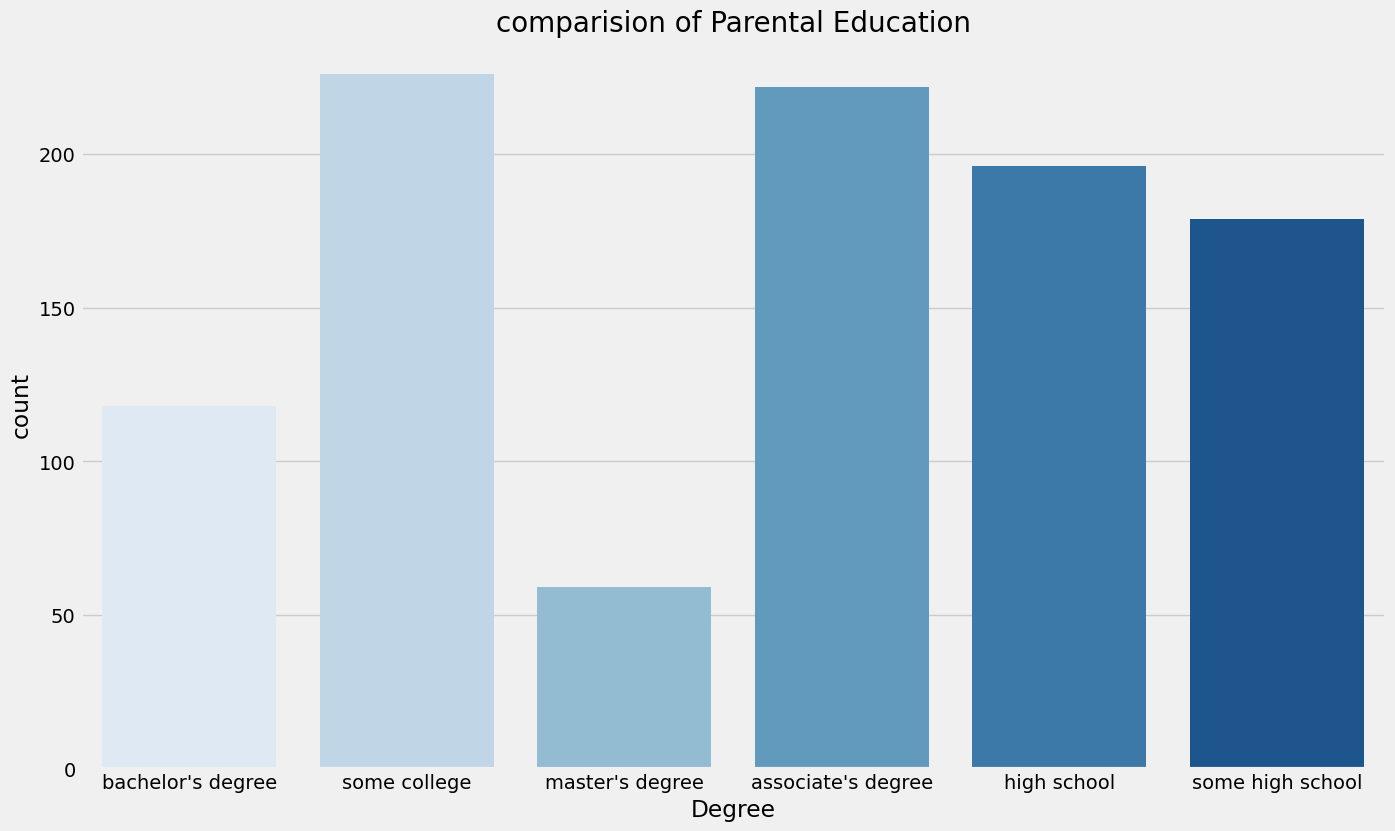

In [60]:
plt.rcParams['figure.figsize']=(15,9)
plt.style.use('fivethirtyeight')
sns.countplot(x=df['parental_level_of_education'],data=df,palette='Blues')
plt.title('comparision of Parental Education',fontweight=30,fontsize=20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

Insights

Largest number of parents are from some college.

BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

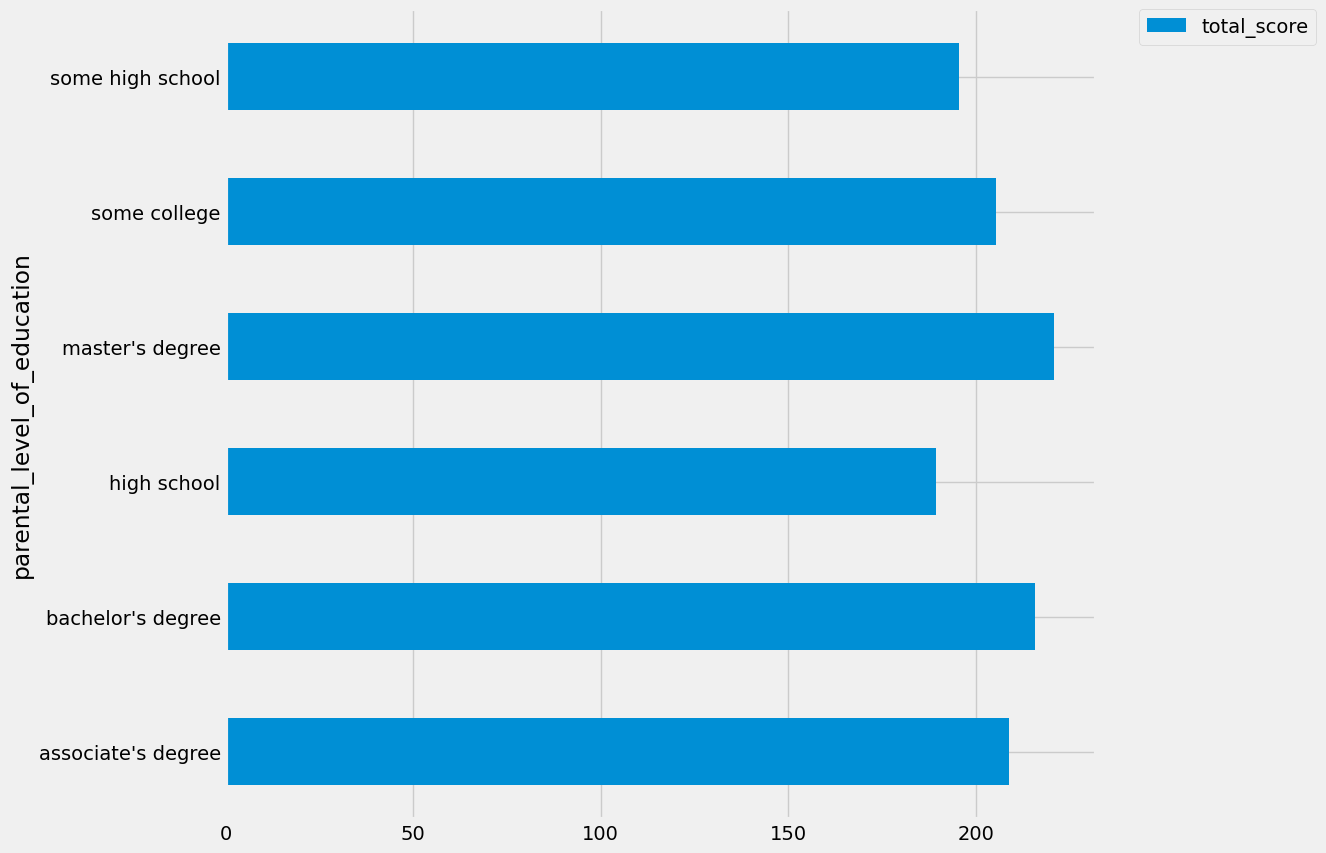

In [63]:
df.groupby('parental_level_of_education')['total_score'].agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
plt.show()

Insights

The score of student whose parents possess master and bachelor level education are higher than others.

4.4.4 LUNCH COLUMN

Which type of lunch is most common amoung students ?

What is the effect of lunch type on test results?

UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

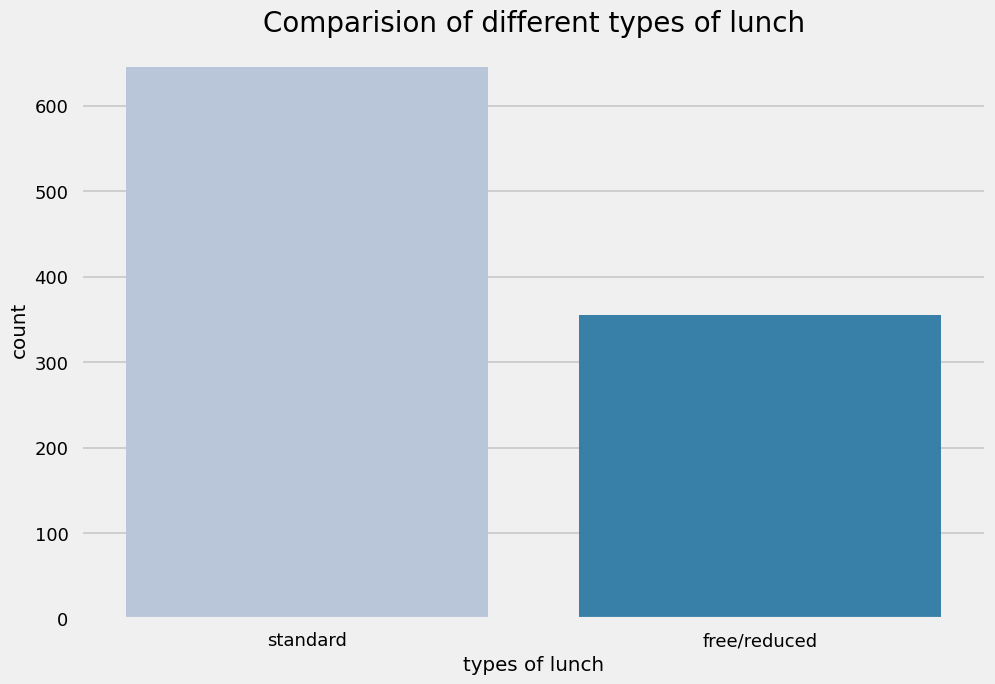

In [64]:
plt.rcParams['figure.figsize']=(15,9)
plt.style.use('seaborn-talk')
sns.countplot(x=df['lunch'],data=df,palette='PuBu')
plt.title('Comparision of different types of lunch',fontweight=30,fontsize=20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

Insights

Students being served Standard lunch was more than free lunch

BIVARIATE ANALYSIS ( Is lunch type intake has any impact on student's performance ? )

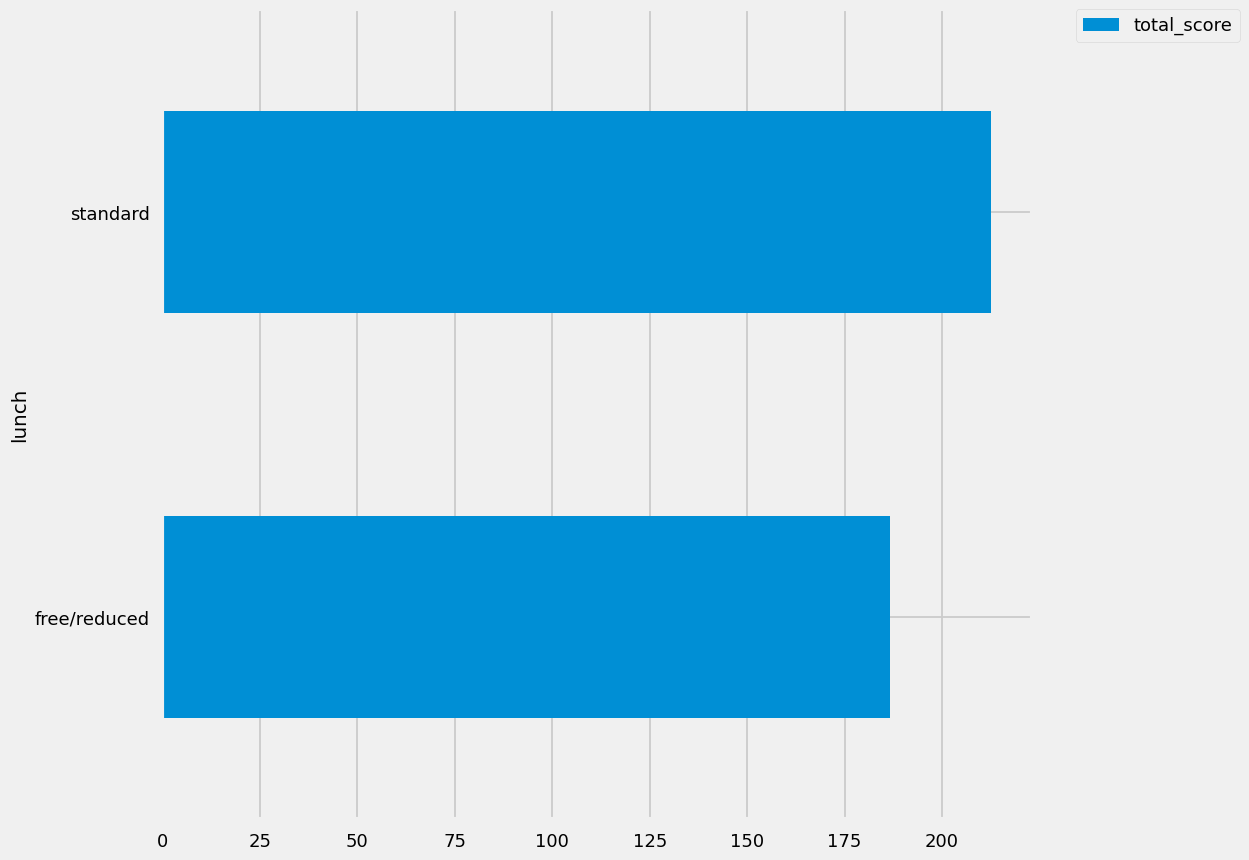

In [80]:
df.groupby('lunch')['total_score'].agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
plt.show()

In [81]:
'''f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental_level_of_education'],data=df,palette='bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

sns.countplot(x=df['parental_level_of_education'],data=df,palette='bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)'''

"f,ax=plt.subplots(1,2,figsize=(20,8))\nsns.countplot(x=df['parental_level_of_education'],data=df,palette='bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])\nax[0].set_title('Students vs test preparation course',color='black',size=25)\nfor container in ax[0].containers:\n    ax[0].bar_label(container,color='black',size=20)\n\nsns.countplot(x=df['parental_level_of_education'],data=df,palette='bright',hue='lunch',saturation=0.95,ax=ax[1])\nfor container in ax[1].containers:\n    ax[1].bar_label(container,color='black',size=20)"

Insights

Students who get Standard Lunch tend to perform better than students who got free/reduced lunch(it is not correct graph)

4.4.5 TEST PREPARATION COURSE COLUMN

Which type of lunch is most common amoung students ?

Is Test prepration course has any impact on student's performance ?

BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Axes: xlabel='lunch', ylabel='writing_score'>

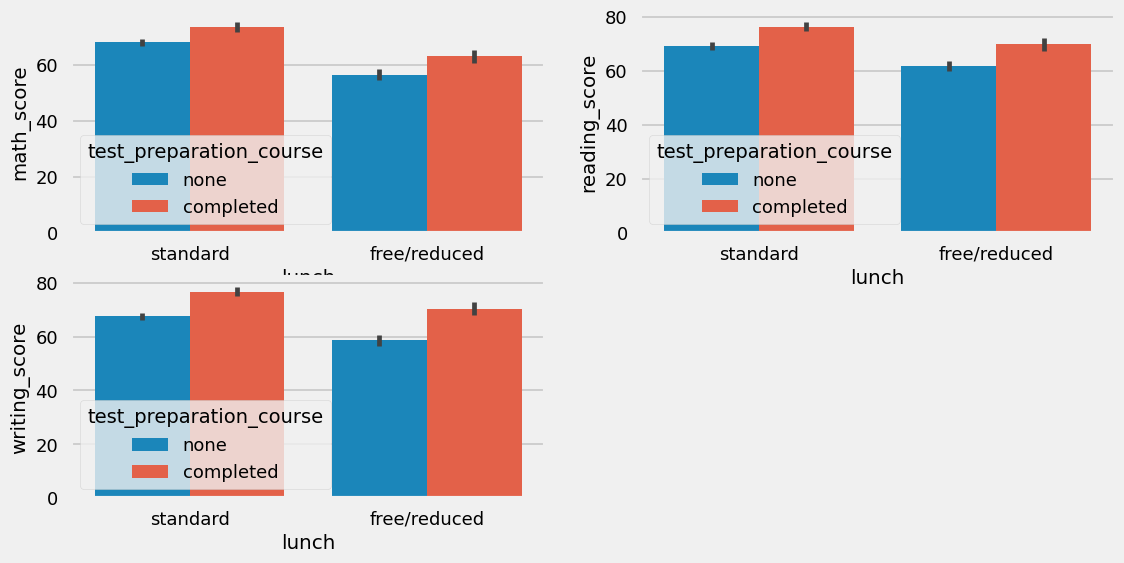

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot(x=df['lunch'],y=df['math_score'],hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot(x=df['lunch'],y=df['reading_score'],hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot(x=df['lunch'],y=df['writing_score'],hue=df['test_preparation_course'])

Insights

Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

4.4.6 CHECKING OUTLIERS

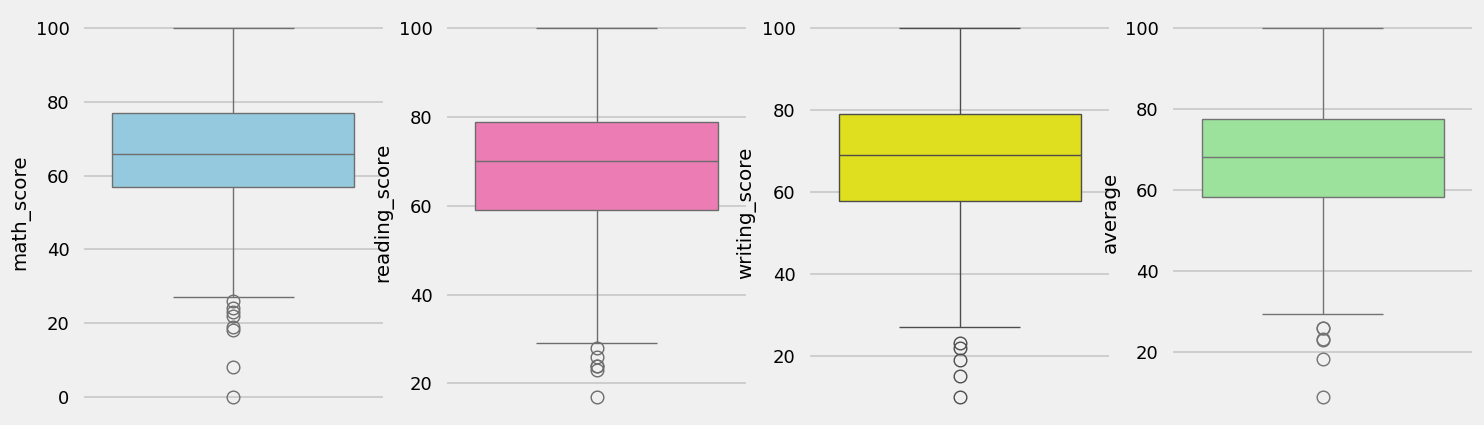

In [76]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

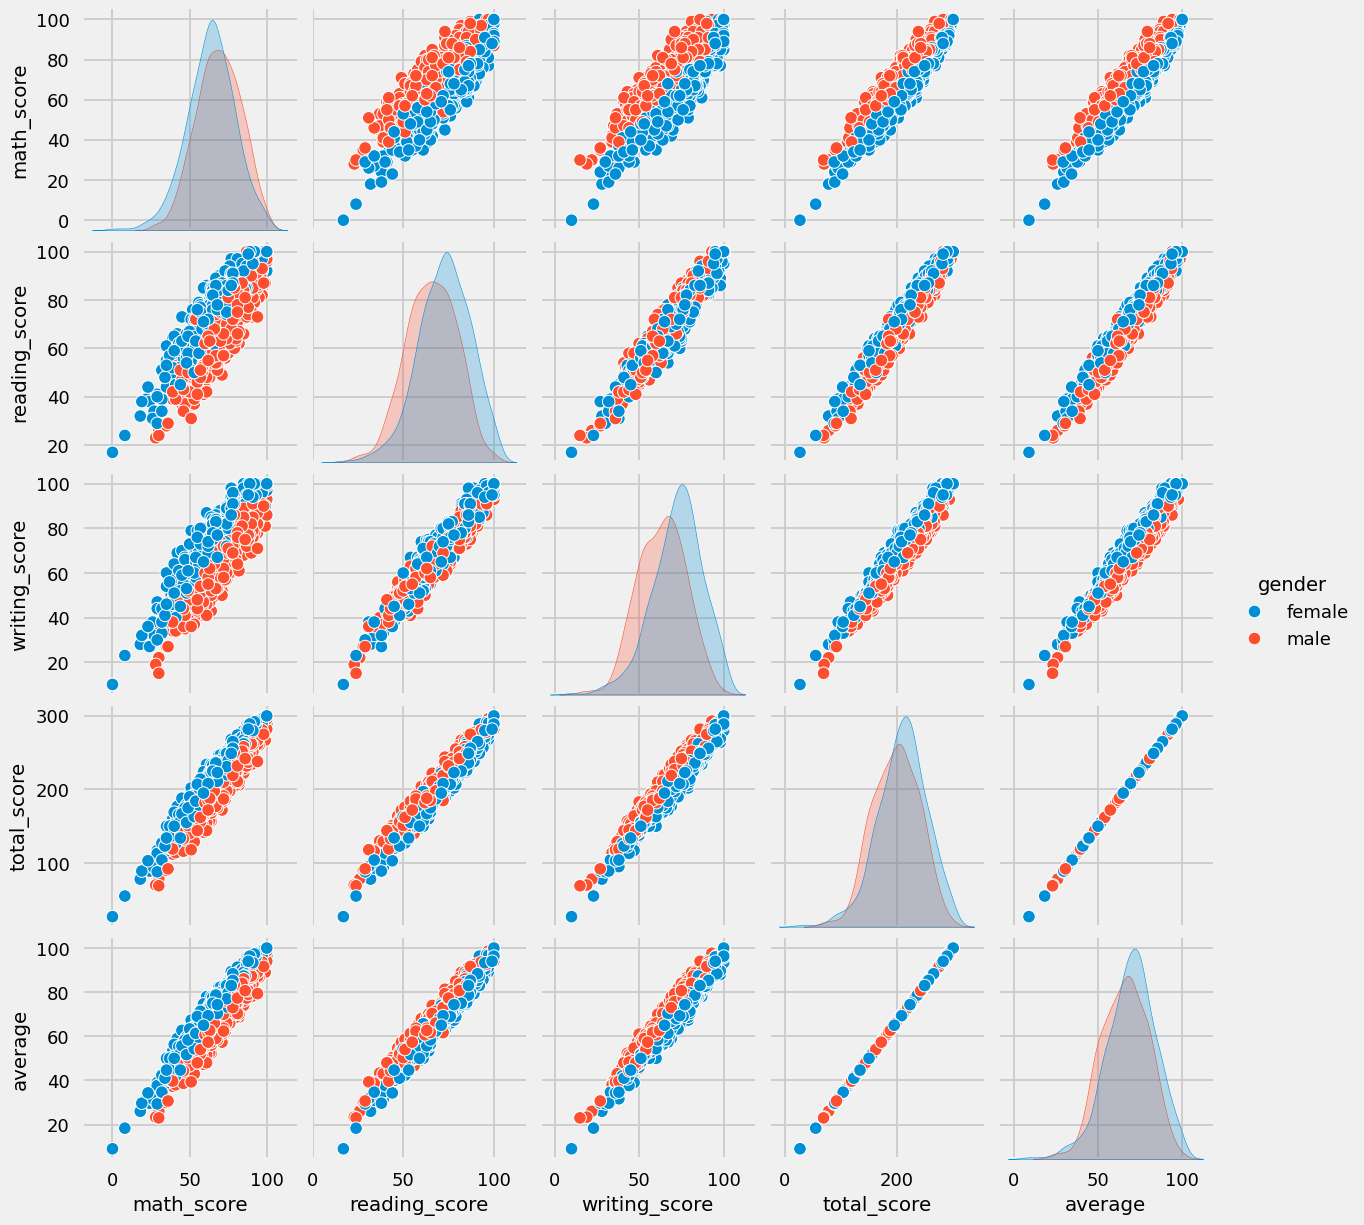

In [77]:
sns.pairplot(df,hue='gender')
plt.show()

Insights

From the above plot it is clear that all the scores increase linearly with each other.

Conclusions

1. Student's Performance is related with lunch, race, parental level education

2. Females lead in pass percentage and also are top-scorers

3. Student's Performance is not much related with test preparation course

4. Finishing preparation course is benefitial.